In [9]:
import os
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
path = '../Data/Preprocessed/샴푸&두피케어_샴푸&영양제.xlsx'

df_origin = pd.read_excel(path)
df_origin = df_origin[df_origin['category'] == '[탈모샴푸&토닉]']
df_origin['date'] = pd.to_datetime(df_origin['date'])
df_origin['view'] = df_origin['view'].apply(lambda x : int(re.sub('[^0-9]', '', x)))
df_origin.head(2)

,title,category,date,writer,rank,view,href,content,imageList,titleContent,preprocessedSentence,keyword,sentimentResult,propTopic,propTopicRatio,topicsRatio,cluster
0,댕기머리 4년째 사용 중입니다.,[탈모샴푸&토닉],2013-01-01,지투,5,1205,https://daedamo.com/balmo/28438?page=113&overl...,"저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예전에는 기골드를, 현재는 진기를 ...",[],"댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데, 제품은 예...",댕기머리 4년째 사용 중입니다. 저는 댕기머리만을 4년째 쓰고 있는 데 제품은 예전...,"['댕기', '머리', '년', '사용', '댕기', '머리', '년', '쓰다',...",NaN,3,0.6424,"[(1, 0.34510082), (3, 0.6423908)]",2
1,"탈모예방 - 머리 감는 법,샴푸 고르는 법",[탈모샴푸&토닉],2013-01-01,멋진후니,2,1840,https://daedamo.com/balmo/28457?page=113&overl...,요즘 머리가 빠지고 그래서 알아봤더니... 두피관리가 중요하다고 하는데 그중에서 ...,[],"탈모예방 - 머리 감는 법,샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니....",탈모예방 머리 감는 법 샴푸 고르는 법 요즘 머리가 빠지고 그래서 알아봤더니.....,"['탈모', '예방', '머리', '감다', '법', '샴푸', '고르다', '법'...",NaN,4,0.4490,"[(1, 0.025741605), (2, 0.014991964), (3, 0.442...",1


In [14]:
# 샴푸&영양제: rank별 평균 조회수
df = df_origin.copy()
result = df.groupby(['rank']).agg({'href' : 'count', 'view' : 'mean'}).reset_index()
result['view'] = result['view'].apply(lambda x : round(x))
result

,rank,href,view
0,1,36,4032
1,2,422,3308
2,3,823,2888
3,4,591,2608
4,5,453,2659
5,6,242,2542
6,8,39,2488
7,9,187,2782
8,10,107,3536
9,11,83,2530


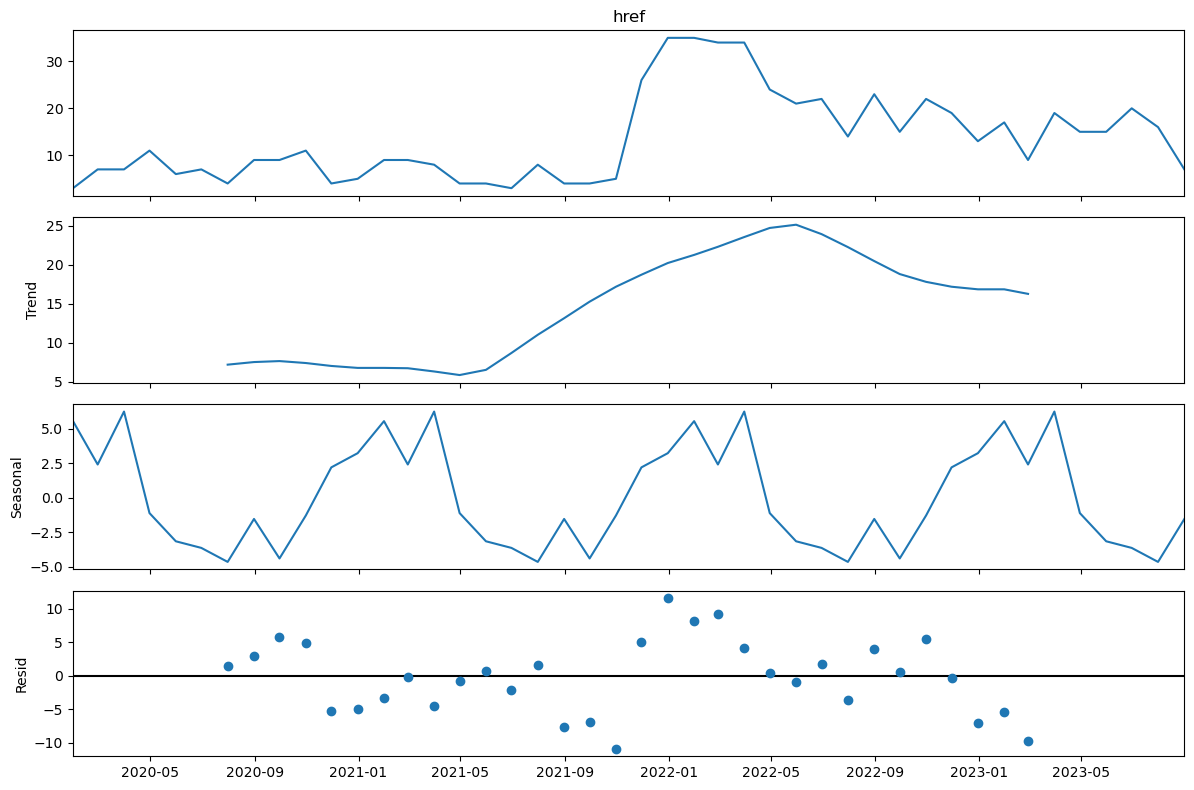

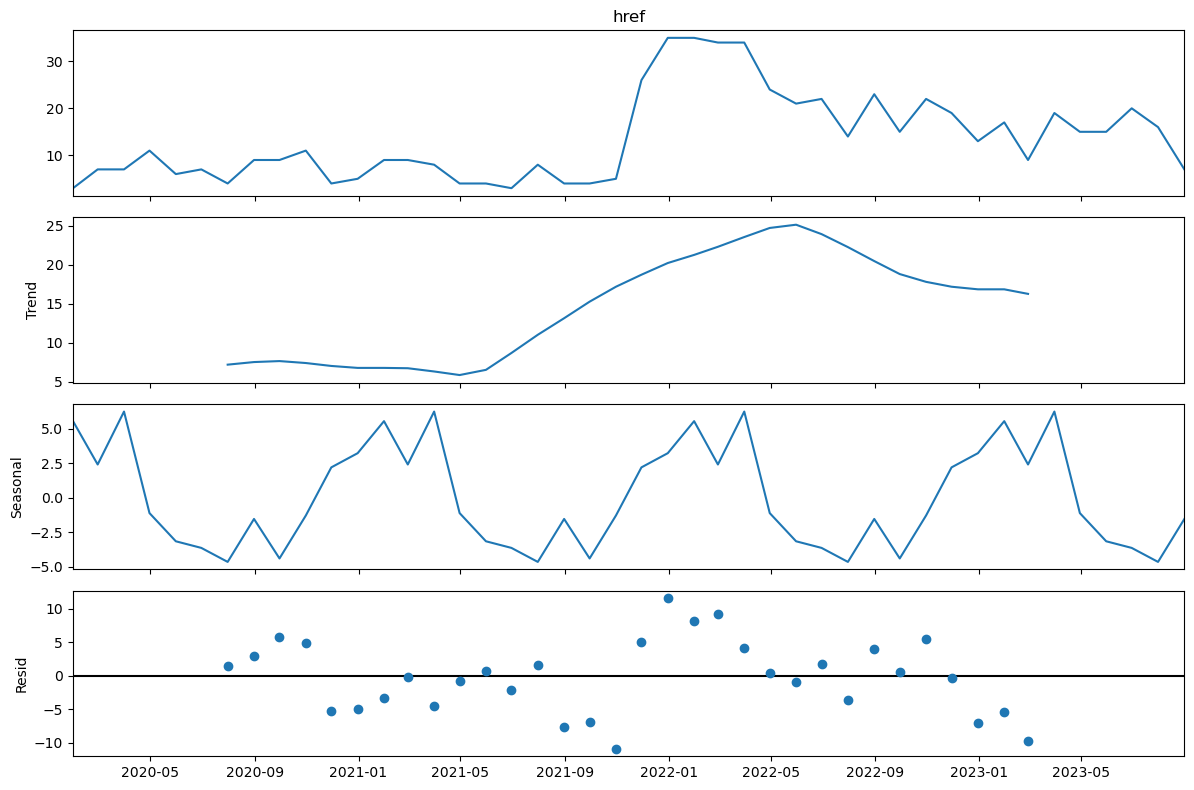

In [27]:
# 샴푸&영양제: 2020 이후, 시계열 분석
df = df_origin.copy()
df = df[df['date'] >= '2020-01-01']
df.set_index('date', inplace = True)
result = df.resample('1M')['href'].count()
result = seasonal_decompose(result, model = 'additive')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()